In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import nibabel as nib
from scipy.ndimage import map_coordinates, gaussian_filter
import matplotlib.pyplot as plt

In [2]:
label = nib.load("samseg.nii.gz").get_fdata()
image = label

In [3]:
sigma = 2
alpha = 5

In [5]:
random_state = np.random.RandomState(None)

shape = image.shape

dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
dz = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))

indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z+dz, (-1, 1))
new_img =  map_coordinates(image, indices, order=1, mode='nearest').reshape(shape)

In [27]:
dx.max()

0.9611012274370984

In [28]:
dx.shape

(160, 256, 256)

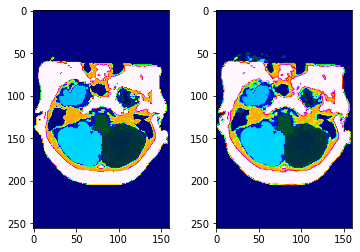

In [29]:
plt.figure()
plt.subplot(121)
plt.imshow(np.rot90(image[:, :, 100]), cmap="gist_ncar")
plt.subplot(122)
plt.imshow(np.rot90(new_img[:, :, 100]), cmap="gist_ncar")
plt.show()